(28, 28, 4)
<class 'numpy.ndarray'>


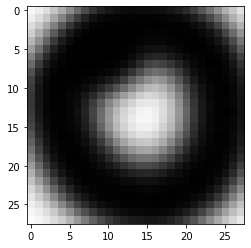

In [3]:
import matplotlib.pyplot as plt
c0 = plt.imread('test/0/1.png')
print(c0.shape) # 4: RGBA(RGB와 투영도)
print(type(c0))
plt.imshow(c0)

In [7]:
from PIL import Image
import numpy as np
c0 = Image.open('test/0/1.png')
display(c0)
c0 = np.array(c0)
c0
print(c0.shape)




(28, 28, 4)


# CNN

In [8]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D # 필터링(특징추출)
from tensorflow.keras.layers import MaxPooling2D # 풀링
from tensorflow.keras.layers import Flatten #2차원 데이터를 1차원
from tensorflow.keras.layers import Dense, Dropout
np.random.seed(3)

In [9]:
temp = Image.open('data/handwriting/handwriting_shape/train/circle/circle001.png')
np.array(temp).shape

(24, 24, 4)

In [10]:
#1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255) # 정규화 작업
train_data = train_datagen.flow_from_directory(
            'data/handwriting/handwriting_shape/train',
            target_size = (24,24),
            class_mode = 'categorical',
            batch_size = 3
)

test_datagen = ImageDataGenerator(rescale=1./255) # 정규화 작업
test_data = test_datagen.flow_from_directory(
            'data/handwriting/handwriting_shape/test',
            target_size=(24,24),
            class_mode = 'categorical',
            batch_size = 3
)


Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [14]:
#2. 모델 구성
## Conv2d(필터갯수, 필터사이즈, activation_fun, 입력shape)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # 2*2에서 제일 큰 값만 뽑아 이미지 축소
model.add(Flatten()) # 2차원 데이터를 1차원으로
model.add(Dense(units=128, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [16]:
# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy",optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit_generator(train_data, steps_per_epoch=15, epochs=50, validation_data = test_data, validation_steps=5)

C:\Users\sangh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
15/15 [==============================] - 1s 31ms/step - loss: 1.1318 - accuracy: 0.6000 - val_loss: 0.6298 - val_accuracy: 1.0000
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.2742 - accuracy: 0.9778 - val_loss: 0.1505 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.0872 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0642 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0532 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 6.0411e-04 - accuracy: 1.0000 - val_loss: 0.0803 - val_accuracy: 0.9333
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 4.5619e-04 - accuracy: 1.0000 - val_loss: 0.0811 - val_accuracy: 0.9333
Epoch 8/50


In [17]:
# 모델 평가
score = model.evaluate_generator(test_data, steps=5)
print('loss :', score[0])
print('accuracy :', score[1])

loss : 0.14936360716819763
accuracy : 0.9333333373069763


C:\Users\sangh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [20]:
# 예측하기
pred = model.predict_generator(test_data)
print(test_data.class_indices)
np.set_printoptions(formatter={'float':lambda x : "{:0.2f}".format(x)})
print(pred)

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[1.00 0.00 0.00]
 [1.00 0.00 0.00]
 [0.00 1.00 0.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [1.00 0.00 0.00]
 [1.00 0.00 0.00]
 [0.00 1.00 0.00]
 [0.00 0.00 1.00]
 [0.00 1.00 0.00]
 [0.79 0.11 0.10]
 [0.00 0.00 1.00]
 [0.00 0.01 0.99]
 [0.00 1.00 0.00]
 [1.00 0.00 0.00]]


C:\Users\sangh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


# accuracy 늘리기
    * 데이터 확보, 데이터 부풀리기(ImageDataGenerator)
    * 레이어 층(Conv, Dense)

In [22]:
#1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255,   # 정규화 작업
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,   #0.7라이안 밀림
                                   zoom_range=[0.9,2.1],
                                   horizontal_flip=True, #수평방향 뒤집기
                                   vertical_flip=True,
                                   fill_mode ='nearest' # 이미지 확대시 채우는 방식
                                  )
train_data = train_datagen.flow_from_directory(
            'data/handwriting/handwriting_shape/train',
            target_size = (24,24),
            class_mode = 'categorical',
            batch_size = 3
)

test_datagen = ImageDataGenerator(rescale=1./255) # 정규화 작업
test_data = test_datagen.flow_from_directory(
            'data/handwriting/handwriting_shape/test',
            target_size=(24,24),
            class_mode = 'categorical',
            batch_size = 3
)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [23]:
#2. 모델 구성
## Conv2d(필터갯수, 필터사이즈, activation_fun, 입력shape)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # 2*2에서 제일 큰 값만 뽑아 이미지 축소
model.add(Dropout(0.1)) # 과적합을 막는 목적
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten()) # 2차원 데이터를 1차원으로
model.add(Dense(units=128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [24]:
# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy",optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit_generator(train_data, steps_per_epoch=15, epochs=50, validation_data = test_data, validation_steps=5)

C:\Users\sangh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
15/15 [==============================] - 1s 14ms/step - loss: 1.1305 - accuracy: 0.2222 - val_loss: 1.0926 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 1.1003 - accuracy: 0.3556 - val_loss: 1.0947 - val_accuracy: 0.4000
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 1.0981 - accuracy: 0.4000 - val_loss: 1.0953 - val_accuracy: 0.1333
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 1.0957 - accuracy: 0.5333 - val_loss: 1.0863 - val_accuracy: 0.5333
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 1.0985 - accuracy: 0.3111 - val_loss: 1.0405 - val_accuracy: 0.6667
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 1.0733 - accuracy: 0.4000 - val_loss: 1.0184 - val_accuracy: 0.6667
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 1.0113 - accuracy: 0.6444 - val_loss: 0.8673 - val_accuracy: 0.7333
Epoch 8/50
15/15 [=